# 확률적 경사 하강법을 사용한 분류 모델

간단하게 말해서 기울기가 0이 되는 부분을 찾는 것. 전체 샘플을 사용하지 않고 **딱 하나의 샘플**을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다.

훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어서 학습을 계속 이어나갈 수 있다.

**신경망 알고리즘에서 사용됨.**

# 미니배치 경사 하강법(minibatch gradient descent)

여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식.

**신경망 알고리즘에서 사용됨.**

# 배치 경사 하강법(batch gradient descent)

한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방식

# 손실 함수(loss function)

 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준.

 값이 작을수록 좋다. 하지만, 어떤 값이 최솟값인지 알 수 없기 때문에 하강법을 실시하여 최솟값을 찾아내야한다.

 대부분의 문제는 그에 맞는 손실 함수가 정해져있다.

 **분류에서의 손실은 정답을 맞추지 못하는 것이다.**



**비용 함수(cost function) = 손실 함수(loss function)**

손실 함수는 샘플 하나에 대한 손실을 정의하고, 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말한다.

**기술적으로 말하자면 손실 함수는 미분(한 점에 대해 기울기를 수치화할 수 있어야 한다.) 가능해야 한다.(연속적이어야 한다.)**




## [로지스틱의 손실 함수(logistic loss function) or 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)](https://yoon1seok.tistory.com/34)

간단히 말해서 예측 확률이 높을수록, 손실 함수(**양의 클래스일 경우 $-log(예측 확률)$의 곱**, **음의 클래스일 경우 $-log(1-예측 확률)$의 곱**이 낮은 경우가 좋다.)



- 양의 클래스의 손실은 1에서 멀어질수록 아주 큰 양수가 된다.

- 음의 클래스의 손실은 0에서 멀어질수록 아주 큰 양수가 된다. 

- 손실 함수를 사용하면 로지스틱 회귀 모델이 만들어진다.

## 크로스엔트로피 손실 함수(cross-entropy loss function)

다중 분류에서 사용되는 손실 함수.

## 평균 제곱 오차(mean squared error)

회귀의 손실 함수.

타깃에서 예측을 뺀 값을 제곱한 다음, 모든 샘플에 평균한 값.(작을수록 좋은 모델이다.)

# 확률적 경사 하강법(stochastic gradient bescent) 사용 순서

## 1. 데이터 전처리

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()    # input에는 특성을 numpy의 형태로 넣는다.
fish_target = fish[['Species']].to_numpy()                                           # target에는 클래스를 numpy의 형태로 넣는다.

In [ ]:
print(fish_input.shape, fish_target.shape)

(159, 5) (159, 1)


In [ ]:
from sklearn.model_selection import train_test_split                                # 위에서 numpy로 정리한 데이터를 훈련 세트와 테스트 세트로 나눈다.

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler                                    # 정규화를 통해 전처리 과정을 거친다.

ss = StandardScaler()

ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 2. SGDClassifier 사용하기

사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 **분류용 클래스**.

객체에 한 번 훈련 세트를 전달하지만, 이 알고리즘은 전달한 **훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행**한다.(미니배치 경사 하강법이나 배치 경사 하강법을 제공하지 않는다.)



객체를 만들 때, 매개변수를 지정한다.

- **loss = 'log'** : 로지스틱의 손실 함수를 지정.('log'는 **클레스마다 이진 분류 모델을 만들어**준다. 즉, **하나의 클래스를 양성으로 두고 나머지 클래스는 음성으로 설정하는 것이다.**) 기본값은 서포트 벡터 머신을 위한 'hinge' 손실이다.

- **max_iter** : 수행할 에포크(확률적 경사 하강법에서 전체 샘플을 모두 사용하여 한 번 반복하는 것.)의 횟수를 지정. 기본값은 1000이다.

- **tol** : 매개변수의 반복을 멈출 조건. n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단한다. 기본값은 0.001이고 n_iter_no_change의 기본값은 5이다.

### SGDRegressor
 
확률적 경사 하강법을 사용한 회귀 모델을 만든다.(오차를 나타내는 'squared loss'이다.)

SGDRegressor의 매개변수는 SGDClassifier와 동일하다.

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sc = SGDClassifier()
sc.fit(train_scaled, train_target)                                                 # SGDClassifier를 사용하여 훈련 세트의 훈련을 시킨다.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.85


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
sc.partial_fit(train_scaled, train_target)                                         # 다시 훈련을 시작할 때는 fit이 아닌 partial_fit을 사용한다.
print(sc.score(train_scaled, train_target))                                        # partial_fit은 딱 한 번의 iteration만 진행하는 것을 말한다.
print(sc.score(test_scaled, test_target))                                          # 다시 말해, fit의 max_iter=10을 설정했다면 partial_fit을 총 10번 진행한 것과 같다는 말이다.

0.7983193277310925
0.85


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


에포크를 더 실행하면 정확도가 향상된다.

## 조기 종료(early stopping)

확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.

에포크의 횟수가 적으면 훈련 세트를 덜 학습한다. 즉, 과소적합이 될 가능성이 높아진다. 하지만, 에포크 횟수가 너무 많으면 훈련에만 잘 맞는 모델로 발전한다. 다시 말해, 과대적합이 될 가능성이 증가한다.

이런 현상을 예방하기 위해 과대적합이 시작되기 전에 훈련을 멈추는 것을 **조기 종료(early stopping)**라고 한다.

In [ ]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):                                                               # '_'는 특별한 변수이다. 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용한다. 여기서는 0에서 299까지 반복 횟수를 임시 저장하기 위한 용도로 사용했다.
    sc.partial_fit(train_scaled, train_target, classes=classes)                    # classes는 4-1에서 사용했던 kn.classes_와 같은 것으로 지정된 클래스를 보여주는 역할을 했다.
    train_score.append(sc.score(train_scaled, train_target))                       # 즉, partial_fit 훈련을 하는데 클래스를 train_target으로 설정한 것이다.
    test_score.append(sc.score(test_scaled, test_target))

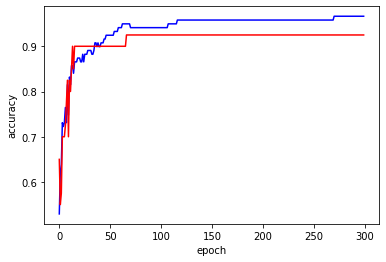

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score, color='blue')
plt.plot(test_score, color='red')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100번째 이후에 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지는 것을 확인할 수 있다.

또한, 초기에는 과소적합이라는 사실을 알 수 있다.

In [ ]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)             # 과소, 과대적합을 없애기 위해 max_iter을 100으로 조절하고 조기 종료를 위해 tol을 None으로 설정한다.
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.957983193277311
0.925
